<h1>Self organizing maps with minisom

Self-organizing maps are a class of unsupervised learning neural networks used for feature detection. They’re used to produce a low-dimension space of training samples. Therefore, they’re used for dimensionality reduction.

![title](SOM.png)

In [27]:
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt
import pickle

%matplotlib inline

<h2>Minisom Example

In [29]:
data = [[ 0.80,  0.55,  0.22,  0.03],
        [ 0.82,  0.50,  0.23,  0.03],
        [ 0.80,  0.54,  0.22,  0.03],
        [ 0.80,  0.53,  0.26,  0.03],
        [ 0.79,  0.56,  0.22,  0.03],
        [ 0.75,  0.60,  0.25,  0.03],
        [ 0.77,  0.59,  0.22,  0.03]]    

som = MiniSom(6, 6, 4, sigma=0.3, learning_rate=0.5) # initialization of 6x6 SOM
som.train(data, 100) # trains the SOM with 100 iterations

#psoition of the winning neuron
print(som.winner(data[0]))

(1, 4)


<h2>House Example

In [41]:
img = plt.imread('house2.png')
print(img.shape)
#convert from 3d matrix into 2d array by multiplying the height * width
pixels = np.reshape(img, (img.shape[0]*img.shape[1], 4))
print(pixels.shape)

(854, 1280, 4)
(1093120, 4)


In [44]:
som = MiniSom(x= 4, y = 4, input_len = 4, sigma=0.1, learning_rate=0.2) #4 x 4 som s.t. we in final get 9 colors
#input len = number of features in our dataset
#sigma is radius of diffrent neighbors
#learning rate is how much weights are adjusted during each iteration

#initialize the SOM’s weights to small, standardized random values
som.random_weights_init(pixels)


In [45]:
#save starting weights
starting_weights = som.get_weights().copy()

#train pixels
som.train_random(pixels, 100)

#quantize each pixel of the image
qnt = som.quantization(pixels)

In [46]:
print(img.shape)

(854, 1280, 4)


In [47]:
#build back the image as 3d array
clustered = np.zeros(img.shape)

#place the quantized values into a new image
for i, q in enumerate(qnt):
  clustered[np.unravel_index(i, shape=(img.shape[0], img.shape[1]))] = q

#unravel Converts a flat index or array of flat indices into a tuple of coordinate arrays.

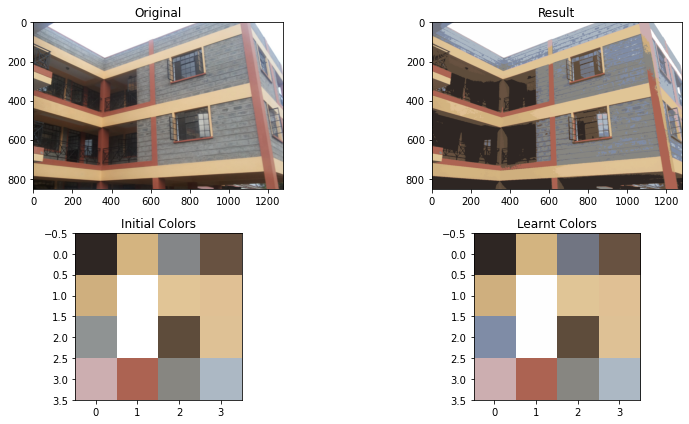

In [48]:
plt.figure(figsize=(12, 6))
plt.subplot(221)
plt.title('Original')
plt.imshow(img)
plt.subplot(222)
plt.title('Result')
plt.imshow(clustered)
plt.subplot(223)
plt.title('Initial Colors')
plt.imshow(starting_weights)
plt.subplot(224)
plt.title('Learnt Colors')
plt.imshow(som.get_weights())
plt.tight_layout()
plt.show()

<h2>On gapminder data

In [50]:
!pip install gapminder

In [91]:
from gapminder import gapminder
#yearly change in countries regardding, life expectancy, population and gdp per cap
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [101]:
#Wrangle with gapminder 
dataset = gapminder
dataset = gapminder.groupby("country")[["lifeExp","pop","gdpPercap"]].mean() 
dataset.loc[dataset["lifeExp"] < 70, "Nice_Place"] = 0 
dataset.loc[dataset["lifeExp"] > 70, "Nice_Place"] = 1     
dataset["Nice_Place"] = dataset["Nice_Place"].astype(int) 
X = dataset.iloc[:,0:3] 
y = dataset.iloc[:,3]
print(dataset.head(n=10))

               lifeExp           pop     gdpPercap  Nice_Place
country                                                       
Afghanistan  37.478833  1.582372e+07    802.674598           0
Albania      68.432917  2.580249e+06   3255.366633           0
Algeria      59.030167  1.987541e+07   4426.025973           0
Angola       37.883500  7.309390e+06   3607.100529           0
Argentina    69.060417  2.860224e+07   8955.553783           0
Australia    74.662917  1.464931e+07  19980.595634           1
Austria      73.103250  7.583298e+06  20411.916279           1
Bahrain      65.605667  3.739132e+05  18077.663945           0
Bangladesh   49.834083  9.075540e+07    817.558818           0
Belgium      73.641750  9.725119e+06  19900.758072           1


In [93]:
#Feature Scaling gapminder
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

In [94]:
#Training the SOM gapminder
som = MiniSom(x =14 , y =14 , input_len = 3, sigma = 1.0, 
              learning_rate = 0.5 ) 
som.random_weights_init(X)
som.train_random(data = X , num_iteration = 1000)

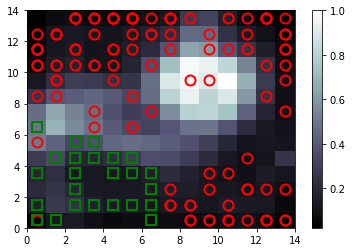

In [95]:
#Visualize the Results gapminder
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ["o","s"]
colors = ["r","g"]
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = "None",
         markersize = 10,
         markeredgewidth = 2)
show()

Countries with a high life expectancy (over 70) are placed close to each other, they are similar for the model.

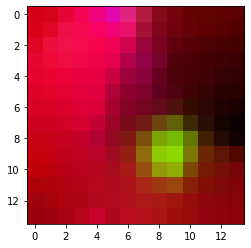

In [96]:
plt.imshow(som.get_weights())
plt.show()

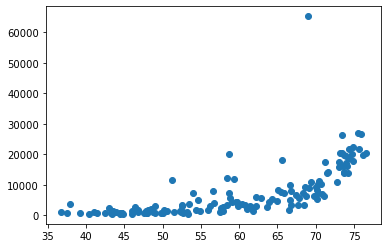

In [98]:
plt.scatter(dataset["lifeExp"], dataset['gdpPercap'])
plt.show()